In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### create the machine learning algorithm

In [2]:
npz = np.load('Brest_Cancer_data_train.npz')
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

npz = np.load('Brest_Cancer_data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('Brest_Cancer_data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

In [3]:
test_inputs.shape

(49, 9)

In [4]:
test_targets.shape

(49,)

In [5]:
train_inputs.shape

(382, 9)

In [6]:
train_targets.shape

(382,)

In [7]:
train_targets

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,

# model
outline, optimizers, loss, early stopping and training

In [8]:
input_size = 9
output_size = 2
hidden_layer_size = 20

model = tf.keras.Sequential([
                            #tf.keras.layers.Dense(100,input_shape = (9,)),
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),    
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'), 
                            tf.keras.layers.Dense(output_size, activation = 'softmax')     
                            ])

# The number of input dimensions is often unnecessary, as it can be inferred
# the first time the layer is used, but it can be provided if you want to
# specify it manually, which is useful in some complex models.
# tf.keras.layers.Dense(10, input_shape=(D,))

#Create an arbitrary graph of layers, by connecting them
#via the apply() method.
input = tf.input({shape: [9]});
dense1 = tf.layers.dense({units: 20, activation: 'relu'}).apply(input);
dense2 = tf.layers.dense({units: 20, activation: 'softmax'}).apply(dense1);
model = tf.model({inputs: input, outputs: dense2});

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

BATCH_SIZE = 60
MAX_EPOCHS = 80

early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
#  'sparse_categorical_crossentropy'

In [10]:
r = model.fit(train_inputs,
             train_targets,
             batch_size = BATCH_SIZE, 
             epochs = MAX_EPOCHS,
             callbacks = [early_stopping],
             validation_data = (validation_inputs, validation_targets),
             verbose = 2)

Train on 382 samples, validate on 47 samples
Epoch 1/80
382/382 - 0s - loss: 0.7955 - accuracy: 0.2801 - val_loss: 0.7051 - val_accuracy: 0.6170
Epoch 2/80
382/382 - 0s - loss: 0.6635 - accuracy: 0.7120 - val_loss: 0.5891 - val_accuracy: 0.8298
Epoch 3/80
382/382 - 0s - loss: 0.5625 - accuracy: 0.8168 - val_loss: 0.4986 - val_accuracy: 0.9149
Epoch 4/80
382/382 - 0s - loss: 0.4772 - accuracy: 0.9136 - val_loss: 0.4263 - val_accuracy: 0.9362
Epoch 5/80
382/382 - 0s - loss: 0.4105 - accuracy: 0.9398 - val_loss: 0.3636 - val_accuracy: 0.9574
Epoch 6/80
382/382 - 0s - loss: 0.3539 - accuracy: 0.9529 - val_loss: 0.3100 - val_accuracy: 0.9574
Epoch 7/80
382/382 - 0s - loss: 0.3061 - accuracy: 0.9529 - val_loss: 0.2650 - val_accuracy: 0.9574
Epoch 8/80
382/382 - 0s - loss: 0.2656 - accuracy: 0.9607 - val_loss: 0.2276 - val_accuracy: 0.9574
Epoch 9/80
382/382 - 0s - loss: 0.2319 - accuracy: 0.9607 - val_loss: 0.1974 - val_accuracy: 0.9574
Epoch 10/80
382/382 - 0s - loss: 0.2046 - accuracy: 0.9

In [11]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

49/49 [==============================] - 0s 122us/sample - loss: 0.1550 - accuracy: 0.9388


In [12]:
print('\nTest loss: {0:.2f}. Test accuracy: {1: .2f}%'.format(test_loss, test_accuracy*100))


Test loss: 0.16. Test accuracy:  93.88%


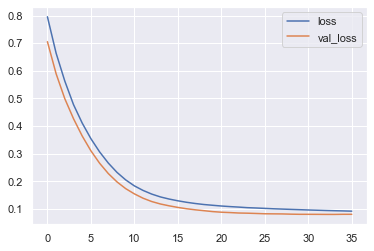

In [13]:
# PLOT LOSS AND VAL_LOSS OBTAINED BY MODEL.FIT()

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()


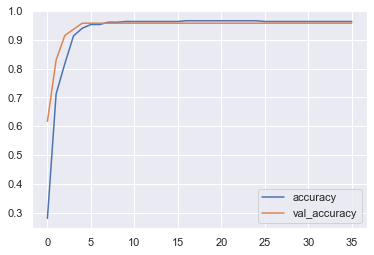

In [14]:
# PLOT ACCURACY OBTAINED BY MODEL.FIT()

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [15]:
# model.predict(np.expand_dims(test_inputs, test_targets) 
prediction = model.predict(test_inputs)
#test_predictions = model.predict(normed_test_data).flatten()

In [16]:
test_inputs.shape

(49, 9)

In [17]:
prediction.shape

(49, 2)

In [18]:
prediction_round = np.round(prediction)

In [19]:
prediction_round

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [20]:
Prediction_1_column = prediction_round[:,1]

In [21]:
Prediction_1_column 

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.],
      dtype=float32)

In [22]:
test_targets

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0])

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(test_targets, Prediction_1_column)
cm

array([[23,  0],
       [ 3, 23]], dtype=int64)

In [25]:
#MAKING A DATAFRAME FOR THE CONFUSION MATRIX

cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,23,0
Actual 1,3,23


Text(30.5, 0.5, 'Truth')

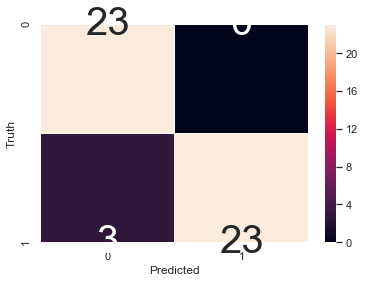

In [26]:
#TO VISUALIZE THE CONFUSION MATRIX

#plt.figure(figsize = (12,10))
sns.heatmap(cm, annot = True,annot_kws={'size':40}, linewidths=.5)
#plt.xlim(-1, 10)
#plt.ylim(-2, 30)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [27]:

model.save('tensorflow brest cancer- 2 output-categorical cross entropy.h5')